## Problem Statement

### Business Context

The healthcare industry is rapidly evolving, with professionals facing increasing challenges in managing vast volumes of medical data while delivering accurate and timely diagnoses. The need for quick access to comprehensive, reliable, and up-to-date medical knowledge is critical for improving patient outcomes and ensuring informed decision-making in a fast-paced environment.

Healthcare professionals often encounter information overload, struggling to sift through extensive research and data to create accurate diagnoses and treatment plans. This challenge is amplified by the need for efficiency, particularly in emergencies, where time-sensitive decisions are vital. Furthermore, access to trusted, current medical information from renowned manuals and research papers is essential for maintaining high standards of care.

To address these challenges, healthcare centers can focus on integrating systems that streamline access to medical knowledge, provide tools to support quick decision-making, and enhance efficiency. Leveraging centralized knowledge platforms and ensuring healthcare providers have continuous access to reliable resources can significantly improve patient care and operational effectiveness.

**Common Questions to Answer**

**1. Diagnostic Assistance**: "What are the common symptoms and treatments for pulmonary embolism?"

**2. Drug Information**: "Can you provide the trade names of medications used for treating hypertension?"

**3. Treatment Plans**: "What are the first-line options and alternatives for managing rheumatoid arthritis?"

**4. Specialty Knowledge**: "What are the diagnostic steps for suspected endocrine disorders?"

**5. Critical Care Protocols**: "What is the protocol for managing sepsis in a critical care unit?"

### Objective

As an AI specialist, your task is to develop a RAG-based AI solution using renowned medical manuals to address healthcare challenges. The objective is to **understand** issues like information overload, **apply** AI techniques to streamline decision-making, **analyze** its impact on diagnostics and patient outcomes, **evaluate** its potential to standardize care practices, and **create** a functional prototype demonstrating its feasibility and effectiveness.

### Data Description

The **Merck Manuals** are medical references published by the American pharmaceutical company Merck & Co., that cover a wide range of medical topics, including disorders, tests, diagnoses, and drugs. The manuals have been published since 1899, when Merck & Co. was still a subsidiary of the German company Merck.

The manual is provided as a PDF with over 4,000 pages divided into 23 sections.

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

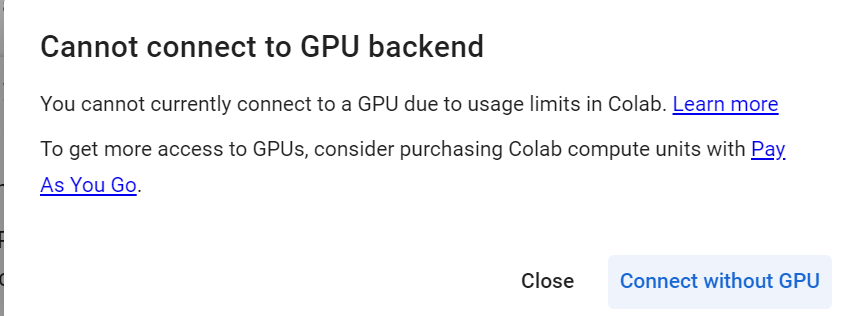

## Installing and Importing Necessary Libraries and Dependencies

In [ ]:
!pip install --upgrade --no-cache-dir \
    huggingface_hub==0.28.1 \
    pandas==2.2.2 \
    numpy==1.25.2 \
    tiktoken==0.6.0 \
    pymupdf==1.25.1 \
    langchain==0.1.1 \
    langchain-community==0.0.13 \
    chromadb==0.4.22 \
    sentence-transformers==2.3.1

In [1]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 142.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 155.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 154.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 135.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 re

In [1]:
# For installing the libraries & downloading models from HF Hub
!pip install huggingface_hub==0.23.2 pandas==1.5.3 tiktoken==0.6.0 pymupdf==1.25.1 langchain==0.1.1 langchain-community==0.0.13 chromadb==0.4.22 sentence-transformers==2.3.1 numpy==1.25.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.4 MB

In [1]:
#Libraries for downloading and loading the llm
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

## Question Answering using LLM

### Downloading and Loading the model

In [2]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [3]:
model_path = hf_hub_download(
    repo_id= model_name_or_path, #Complete the code to mention the repo id
    filename= model_basename #Complete the code to mention the model name
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [4]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path,
    n_ctx=2300,
    n_gpu_layers=38,
    n_batch=512
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [5]:
#uncomment the below snippet of code if the runtime is connected to CPU only.
#llm = Llama(
#    model_path=model_path,
#    n_ctx=1024,
#    n_cores=-2
#)

### Response

In [6]:
def response(query,max_tokens=512,temperature=0.2,top_p=0.9,top_k=30):
    model_output = llm(
      prompt=query,
      max_tokens=max_tokens,
      temperature=temperature,
      top_p=top_p,
      top_k=top_k
    )

    return model_output['choices'][0]['text']

In [7]:
response("What treatment options are available for managing hypertension?")

"\n\nHypertension, or high blood pressure, is a common condition that can increase the risk of various health problems, including heart disease and stroke. The good news is that there are several effective treatment options available to help manage hypertension and reduce the risk of complications. Here are some of the most commonly used treatments:\n\n1. Lifestyle modifications: Making lifestyle changes is often the first line of defense against hypertension. This may include eating a healthy diet rich in fruits, vegetables, whole grains, and lean proteins; limiting sodium intake; getting regular physical activity; maintaining a healthy weight; and reducing stress.\n2. Medications: If lifestyle modifications alone are not enough to control blood pressure, medications may be necessary. There are several classes of drugs used to treat hypertension, including diuretics, beta blockers, ACE inhibitors, calcium channel blockers, and ARBs (angiotensin receptor blockers).\n3. Combination ther

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [8]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit


'\n\nSepsis is a life-threatening condition that can arise from an infection, and it requires prompt recognition and aggressive management in a critical care unit. The following are general steps for managing sepsis in a critical care unit:\n\n1. Early recognition: Recognize the signs and symptoms of sepsis early and initiate treatment as soon as possible. Sepsis can present with various clinical features, including fever or hypothermia, tachycardia or bradycardia, altered mental status, respiratory distress, and lactic acidosis.\n2. ABCs: Ensure airway patency, adequate breathing, and circulation. Provide high-flow oxygen via a non-rebreather mask or endotracheal tube if necessary, and initiate intravenous fluids to maintain adequate blood pressure and organ perfusion.\n3. Antibiotics: Administer broad-spectrum antibiotics as soon as possible based on the suspected source of infection and local microbiology data. Consider obtaining cultures before administering antibiotics if clinical

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [9]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to define the query #2
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ located in the lower right side of the abdomen. The symptoms of appendicitis can vary from person to person, but some common signs include:\n\n1. Abdominal pain: The pain may start as a mild discomfort around the navel or in the lower right abdomen, but it can quickly become severe and localized in the lower right quadrant of the abdomen. The pain may worsen with movement, coughing, or sneezing.\n2. Loss of appetite: People with appendicitis may lose their appetite due to abdominal pain and discomfort.\n3. Nausea and vomiting: Vomiting is a common symptom of appendicitis, especially in the advanced stages of the condition.\n4. Fever: A fever of 100.4°F (38°C) or higher may be present in people with appendicitis.\n5. Constipation or diarrhea: Some people with appendicitis experience constipation, while others have diarrhea.\n6. Inability to pass gas: The inability to pass ga

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [10]:
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to define the query #3
response(user_input_3) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects the hair follicles. It can cause round or oval bald patches on the scalp, but it can also occur on other parts of the body such as the beard area, eyebrows, and eyelashes.\n\nThe exact cause of alopecia areata is not known, but it is believed to be an autoimmune response where the immune system attacks the hair follicles, leading to hair loss. Some possible triggers for this condition include stress, genetics, viral infections, and certain medications.\n\nThere are several treatments that have been shown to be effective in addressing sudden patchy hair loss:\n\n1. Corticosteroids: These are anti-inflammatory drugs that can help reduce inflammation around the hair follicles and promote hair regrowth. They can be applied topically or taken orally.\n2. Minoxidil: This is a medication that has been shown to stimulate hair growth in some people with alopecia areata. It is available over

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [11]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to define the query #4
response(user_input_4) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nThere is no one-size-fits-all answer to this question as the specific treatment recommendations for a person with a brain injury depend on various factors, including the severity and location of the injury, the age and overall health of the individual, and the extent of the resulting impairments. However, I can provide an overview of some common treatments and interventions that may be recommended for individuals with brain injuries.\n\n1. Acute care: In the immediate aftermath of a brain injury, the focus is on providing acute care to stabilize the patient's condition and prevent further damage. This may include measures such as controlling bleeding, managing seizures, providing oxygen and fluids, and monitoring vital signs.\n2. Rehabilitation: Once the acute phase has passed, rehabilitation becomes a key component of treatment for brain injury patients. Rehabilitation may involve a range of therapies, including physical therapy to help with mobility and strength, occupational th

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [12]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to define the query #5
response(user_input_5) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nFirst and foremost, if you suspect that someone has fractured their leg while hiking, it is essential to ensure their safety and prevent further injury. Here are some necessary precautions:\n\n1. Keep the person calm and still: Encourage them to remain as still as possible to minimize pain and prevent worsening the injury.\n2. Assess the situation: Check for any signs of severe bleeding, open wounds, or other injuries. If there is a risk of further injury or if the person's condition appears life-threatening, call emergency services immediately.\n3. Provide first aid: Apply a sterile dressing to any wounds and immobilize the leg using a splint or sling. Do not attempt to realign the bone or try to put it back into place.\n4. Transport the person safely: If possible, carry the person down the trail on a stretcher or make a makeshift stretcher using poles, blankets, and other available materials. Be careful not to jostle the leg during transport.\n5. Seek medical attention: Once you

## Question Answering using LLM with Prompt Engineering

In [13]:
system_prompt = "You are a trusted medical assistant. Respond to healthcare-related questions with accurate, clear, and concise medical information. Structure answers in bullet points or numbered steps when applicable. Avoid speculation and only include evidence-based, clinically verified information. Responses should be direct and practical, suitable for use by doctors, nurses, or healthcare students." #Complete the code to define the system prompt

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [14]:
user_input = system_prompt+"\n"+ "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit


'\n1. Early recognition: Recognize sepsis early based on clinical suspicion, laboratory results, and vital signs. Use the Sequential [Sepsis-related] Organ Failure Assessment (SOFA) score to identify patients at risk of developing sepsis.\n2. Immediate fluid resuscitation: Administer intravenous fluids to maintain adequate tissue perfusion. Aim for a mean arterial pressure (MAP) ≥65 mmHg and a central venous pressure (CVP) between 8-12 cm H2O in mechanically ventilated patients.\n3. Antibiotic administration: Start broad-spectrum antibiotics as soon as possible based on suspected infection source and local microbiology data. Adjust the antibiotic regimen based on culture results and clinical response.\n4. Source control: Identify and address the source of infection, such as drainage of abscesses or debridement of necrotic tissue.\n5. Cardiovascular support: Provide cardiovascular support as needed, including vasopressors to maintain MAP ≥65 mmHg and inotropes to improve cardiac output.

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [15]:
user_input = system_prompt+"\n"+ "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nSymptoms of Appendicitis:\n- Sudden pain in the lower right abdomen that starts near the navel and migrates to the right side.\n- Loss of appetite.\n- Nausea and vomiting.\n- Fever (often low-grade at first, but can rise as high as 103°F or 39.4°C).\n- Abdominal swelling and rigidity.\n- Pain worsens with movement, coughing, or walking.\n- Constipation or diarrhea.\n\nAppendicitis cannot be cured via medicine alone as the appendix will eventually rupture if left untreated. Rupture can lead to peritonitis, a serious inflammation of the abdominal cavity that requires immediate medical attention. The standard treatment for appendicitis is an appendectomy, which involves surgically removing the infected appendix. This procedure can be performed as an open surgery or laparoscopically (keyhole surgery). Both methods have similar success rates and recovery times. After surgery, patients are usually advised to rest, maintain a low-fiber diet for a few days, and avoid heavy lifting or stre

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [16]:
user_input = system_prompt+"\n"+ "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n1. Alopecia Areata: This is an autoimmune condition where the immune system attacks hair follicles, resulting in patchy hair loss. Treatment options include:\n   a. Corticosteroids: Topical or injectable to reduce inflammation and promote hair regrowth.\n   b. Immunotherapy: Injections of diphenylcyclopropenone (DPCP) or squaric acid dibutylester (SADBE) to stimulate an immune response and potentially halt the progression of alopecia areata.\n   c. Minoxidil: Topical application to promote hair growth.\n2. Traction Alopecia: This is caused by excessive pulling or tension on the hair, often due to hairstyles like tight braids, ponytails, or weaves. Treatment includes avoiding damaging hairstyles and allowing natural hair growth.\n3. Nutritional Deficiencies: Lack of essential nutrients such as iron, zinc, or vitamin D can lead to hair loss. A balanced diet or supplements may help address these deficiencies.\n4. Stress: Sudden patchy hair loss can also be caused by emotional or physic

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [17]:
user_input = system_prompt+"\n"+ "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n1. Emergency care: For acute brain injuries, the priority is to ensure the patient's airway is clear, breathing is stable, and circulation is maintained. This may involve intubation, oxygen therapy, and intravenous fluids.\n2. Medications: Depending on the specific injury and symptoms, various medications may be prescribed. For example, anti-inflammatory drugs like corticosteroids or nonsteroidal anti-inflammatory drugs (NSAIDs) may be used to reduce swelling. Seizure medications may be given if the patient experiences seizures.\n3. Rehabilitation: Physical, occupational, and speech therapy can help improve function and mobility after a brain injury. This may include exercises to strengthen muscles, improve coordination, or enhance communication skills.\n4. Surgery: In some cases, surgery may be necessary to remove blood clots or repair damaged tissue. Craniotomy, the surgical removal of a portion of the skull, may be performed to relieve pressure on the brain.\n5. Assistive devices

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [18]:
user_input = system_prompt+"\n"+ "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n1. Assess the severity of the injury:\n   - Check for signs of open wounds, deformity, swelling, or numbness.\n   - Determine if there is any visible bone protruding from the skin.\n2. Immobilize the leg:\n   - Use a splint, sling, or other immobilizing device to prevent further damage and promote healing.\n3. Control bleeding:\n   - Apply direct pressure to the wound with a clean cloth if necessary.\n   - Elevate the injured leg above heart level to reduce swelling and bleeding.\n4. Pain management:\n   - Offer over-the-counter pain relievers like acetaminophen or ibuprofen.\n   - Prescribe stronger pain medication as needed, based on the severity of the injury.\n5. Transport the person to a healthcare facility:\n   - Arrange for emergency medical services if the fracture is severe or if there are other injuries present.\n   - Accompany the person to the hospital and provide support during their care.\n6. Considerations for care and recovery:\n   - Follow the healthcare provider's 

## Data Preparation for RAG

In [19]:
#Libraries for processing dataframes,text
import json,os
import tiktoken
import pandas as pd

#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma

### Loading the Data

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
manual_pdf_path = "/content/drive/MyDrive/Colab Notebooks/Great Learning/Natural Language Processing with Generative AI/Project/medical_diagnosis_manual.pdf" #Complete the code to define the file name

In [22]:
pdf_loader = PyMuPDFLoader(manual_pdf_path)

In [23]:
manual = pdf_loader.load()

### Data Overview

#### Checking the first 5 pages

In [24]:
for i in range(5):
    print(f"Page Number : {i+1}",end="\n")
    print(manual[i].page_content,end="\n")

Page Number : 1
isaacpatrickgross@gmail.com
J86OSXNH24
t for personal use by isaacpatrickgross@
shing the contents in part or full is liable 

Page Number : 2
isaacpatrickgross@gmail.com
J86OSXNH24
This file is meant for personal use by isaacpatrickgross@gmail.com only.
Sharing or publishing the contents in part or full is liable for legal action.

Page Number : 3
Table of Contents
1
Front    ................................................................................................................................................................................................................
1
Cover    .......................................................................................................................................................................................................
2
Front Matter    ......................................................................................................................................................................

#### Checking the number of pages

In [25]:
len(manual)

4114

### Data Chunking

In [26]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=500, #Complete the code to define the chunk size
    chunk_overlap= 75 #Complete the code to define the chunk overlap
)

In [27]:
document_chunks = pdf_loader.load_and_split(text_splitter)

In [28]:
len(document_chunks)

9078

In [29]:
document_chunks[0].page_content

'isaacpatrickgross@gmail.com\nJ86OSXNH24\nt for personal use by isaacpatrickgross@\nshing the contents in part or full is liable'

In [30]:
document_chunks[2].page_content

'Table of Contents\n1\nFront    ................................................................................................................................................................................................................\n1\nCover    .......................................................................................................................................................................................................\n2\nFront Matter    ...........................................................................................................................................................................................\n53\n1 - Nutritional Disorders    ...............................................................................................................................................................\n53\nChapter 1. Nutrition: General Considerations    ...........................................................................................

In [31]:
document_chunks[3].page_content

"254\nChapter 22. Tumors of the GI Tract    ......................................................................................................................................\n275\n3 - Hepatic & Biliary Disorders    ............................................................................................................................................\n275\nChapter 23. Approach to the Patient With Liver Disease    ...........................................................................................\n294\nChapter 24. Testing for Hepatic & Biliary Disorders    ......................................................................................................\n305\nChapter 25. Drugs & the Liver    ................................................................................................................................................\n308\nChapter 26. Alcoholic Liver Disease    ..........................................................................................

As expected, there are some overlaps

### Embedding

In [34]:
#embedding_model = SentenceTransformerEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
embedding_model = SentenceTransformerEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [35]:
embedding_1 = embedding_model.embed_query(document_chunks[0].page_content)
embedding_2 = embedding_model.embed_query(document_chunks[1].page_content)

In [36]:
print("Dimension of the embedding vector ",len(embedding_1))
len(embedding_1)==len(embedding_2)

Dimension of the embedding vector  768


True

In [37]:
embedding_1,embedding_2

([0.009740535169839859,
  -0.05531355366110802,
  0.003368391189724207,
  0.07008679956197739,
  -0.04146837070584297,
  0.008864687755703926,
  0.06018449738621712,
  -0.03511330485343933,
  0.001018700422719121,
  0.008440401405096054,
  0.022032219916582108,
  0.03495124354958534,
  0.006162730511277914,
  0.011168388649821281,
  0.0003806265885941684,
  -0.03754894807934761,
  0.012692185118794441,
  0.013776947744190693,
  -0.08916962146759033,
  -0.007036599330604076,
  -0.04306545853614807,
  0.04142869636416435,
  -0.02163919433951378,
  0.0033500692807137966,
  -0.013866463676095009,
  -0.035110920667648315,
  0.010968321934342384,
  -0.02822399139404297,
  0.015056503005325794,
  0.014254715293645859,
  -0.022030765190720558,
  -0.0039860280230641365,
  0.006345299072563648,
  0.01281365193426609,
  3.476194478935213e-06,
  -0.02423959970474243,
  -0.009093182161450386,
  0.007526678964495659,
  -0.05894104018807411,
  0.12792198359966278,
  -0.009175003506243229,
  0.1213331

### Vector Database

In [38]:
out_dir = 'medical_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [39]:
vectorstore = Chroma.from_documents(
    documents=document_chunks, # your list of Langchain Document objects
    embedding=embedding_model, # SentenceTransformerEmbeddings instance
    persist_directory=out_dir
)

In [40]:
vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)

In [41]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
  (2): Normalize()
), model_name='sentence-transformers/all-mpnet-base-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False)

In [42]:
vectorstore.similarity_search("What are the symptoms of appendicitis?", k=3) #Complete the code to pass a query and an appropriate k value

[Document(page_content="Etiology\nAppendicitis is thought to result from obstruction of the appendiceal lumen, typically by lymphoid\nhyperplasia, but occasionally by a fecalith, foreign body, or even worms. The obstruction leads to\ndistention, bacterial overgrowth, ischemia, and inflammation. If untreated, necrosis, gangrene, and\nperforation occur. If the perforation is contained by the omentum, an appendiceal abscess results.\nSymptoms and Signs\nThe classic symptoms of acute appendicitis are epigastric or periumbilical pain followed by brief nausea,\nvomiting, and anorexia; after a few hours, the pain shifts to the right lower quadrant. Pain increases with\ncough and motion. Classic signs are right lower quadrant direct and rebound tenderness located at\nMcBurney's point (junction of the middle and outer thirds of the line joining the umbilicus to the anterior\nsuperior spine). Additional signs are pain felt in the right lower quadrant with palpation of the left lower\nquadrant (R

### Retriever

In [43]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 3} #Complete the code to pass an appropriate k value
)

In [44]:
rel_docs = retriever.get_relevant_documents("How is appendicitis diagnosed and treated?") #Complete the code to pass the query
rel_docs

[Document(page_content='tenderness is less marked.\nDiagnosis\n• Clinical evaluation\n• Abdominal CT if necessary\n• Ultrasound an option to CT\nWhen classic symptoms and signs are present, the diagnosis is clinical. In such patients, delaying\nlaparotomy to do imaging tests only increases the likelihood of perforation and subsequent complications.\nIn patients with atypical or equivocal findings, imaging studies should be done without delay. Contrast-\nenhanced CT has reasonable accuracy in diagnosing appendicitis and can also reveal other causes of\nan acute abdomen. Graded compression ultrasound can usually be done quickly and uses no radiation\n(of particular concern in children); however, it is occasionally limited by the presence of bowel gas and is\nless useful for recognizing nonappendiceal causes of pain. Appendicitis remains primarily a clinical\ndiagnosis. Selective and judicious use of radiographic studies may reduce the rate of negative\nlaparotomy.\nLaparoscopy can be use

In [59]:
model_output = llm(
      "What are the signs and treatments for appendicitis?", #Complete the code to pass the query
      max_tokens=1024, #Complete the code to pass the maximum number of tokens
      temperature=0.7, #Complete the code to pass the temperature
    )

Llama.generate: prefix-match hit


In [60]:
print(model_output['choices'][0]['text'].strip())

Appendicitis is a common condition that causes inflammation of the appendix, a small pouch at the end of the large intestine. Here are some signs and symptoms of appendicitis:

1. Abdominal pain: The most common symptom of appendicitis is a sharp, cramping pain in the lower right side of the abdomen that may come and go or persist constantly. The pain may worsen when you take deep breaths, cough, or move around.
2. Loss of appetite: You may lose your appetite and feel nauseous or vomit as the appendicitis progresses.
3. Fever: A fever of 100 degrees Fahrenheit (37.8 degrees Celsius) or higher is common with appendicitis.
4. Diarrhea or constipation: Depending on the location and severity of the inflammation, you may experience diarrhea or constipation.
5. Abdominal swelling: Your abdomen may become swollen and tender to the touch as the appendix becomes more inflamed.
6. Inability to pass gas: If the appendix is located near the rectum, you may have difficulty passing gas due to pressu

The above response is somewhat generic and is solely based on the data the model was trained on, rather than the medical manual.  

Let's now provide our own context.

### System and User Prompt Template

Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [69]:
qna_system_message = "You are a trusted medical assistant. Use the provided context to answer healthcare-related questions with medically accurate, clear, and concise information. Only rely on the supplied context when forming answers — do not use prior knowledge or make assumptions. Structure responses using bullet points or numbered steps when appropriate. Avoid speculation and ensure the content is factual, evidence-based, and clinically verified. Your responses should be direct and practical, intended for use by doctors, nurses, or medical students."  #Complete the code to define the system message

In [70]:
qna_user_message_template = (
    "Based on the following context, answer the question:\n\n"
    "Context:\n{context}\n\n"
    "Question:\n{question}"
) #Complete the code to define the user message

### Response Function

In [95]:
def generate_rag_response(user_input,k=3,max_tokens=512,temperature=0.3,top_p=0.85,top_k=20):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = llm(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

## Question Answering using RAG

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [96]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input)

Llama.generate: prefix-match hit


'Answer:\n1. Parenteral antibiotics should be initiated after specimens have been taken for Gram stain and culture, based on suspected source, clinical setting, and previous culture results. Empiric therapy should be started promptly.\n2. Antibiotic regimen may include gentamicin or tobramycin plus a 3rd-generation cephalosporin (cefotaxime or ceftriaxone), ceftazidime with a fluoroquinolone, or monotherapy with maximal doses of ceftazidime or imipenem. Vancomycin should be added if resistant staphylococci or enterococci are suspected, and metronidazole for an abdominal source.\n3. Abscesses must be drained, and necrotic tissues excised to eliminate septic foci.\n4. Normalization of blood glucose levels (80-110 mg/dL or 4.4-6.1 mmol/L) using a continuous IV insulin infusion is essential for critically ill patients, even non-diabetics.\n5. Patients should be monitored frequently: systemic pressure, CVP, PAOP, pulse oximetry, ABGs, blood glucose, lactate, electrolyte levels, renal functi

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [97]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
generate_rag_response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"Answer:\n- Common symptoms for appendicitis include epigastric or periumbilical pain followed by right lower quadrant abdominal pain, anorexia, nausea, vomiting, and fever (37.7 to 38.3°C or 100 to 101°F).\n- Classically, there is tenderness at McBurney's point, Rovsing sign, psoas sign, and obturator sign. However, these signs are present in less than 50% of patients.\n- Appendicitis cannot be cured via medicine alone; surgical removal (laparotomy or laparoscopy) is the standard treatment to prevent complications such as perforation, abscess formation, and peritonitis.\n- Antibiotics are given intravenously for post-operative infection prevention.\n- Fluid status should be maintained with adequate IV fluid and electrolyte replacement.\n- Patients with signs of volume depletion should have urine output monitored with a catheter."

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [98]:
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
generate_rag_response(user_input_3) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Answer:\n- Alopecia Areata: This is a common cause of sudden patchy hair loss. It is an autoimmune disorder affecting genetically susceptible individuals exposed to unclear environmental triggers. The scalp and beard are most frequently affected, but any hairy area may be involved.\n  - Treatment: There is no cure for alopecia areata, but various treatments can help promote regrowth or stabilize existing hair. These include:\n    * Corticosteroids (topical or systemic): To reduce inflammation and suppress the immune response.\n    * Immunomodulators: Drugs like minoxidil or anthralin to stimulate hair growth.\n    * DHT blockers: Finasteride or dutasteride to inhibit dihydrotestosterone (DHT) production, which can contribute to hair loss.\n  - Causes: Alopecia areata is often triggered by stress, infection, or other environmental factors. In some cases, it may be associated with underlying conditions like vitiligo, atopy, thyroid disease, or Zika virus infection.\n- Other possible cau

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [99]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_4) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Please provide medically accurate and clear information.\n\nAnswer:\n1. Initial treatment: Ensure a reliable airway, maintain adequate ventilation, oxygenation, and blood pressure. Surgery may be needed for patients with more severe injury to place monitors, decompress the brain, or remove intracranial hematomas.\n2. First few days after injury: Maintain adequate brain perfusion and oxygenation, prevent complications of altered sensorium.\n3. Subsequent treatment: Many patients require rehabilitation.\n4. Common causes of TBI: Motor vehicle crashes, transportation-related causes, falls (especially in older adults and young children), assaults, and sports activities.\n5. Structural changes from head injury: Can be gross or microscopic, depending on the mechanism and forces involved.\n6. Open injuries: Penetration of the scalp and skull, typically involve bullets or sharp objects but can also include skull fractures with overlying lacerations due to severe blunt force.\n7. Closed injuri

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [100]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
generate_rag_response(user_input_5) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"Answer:\n1. Assess the severity of the injury: Determine if it's an open or closed fracture based on whether the skin is broken. If it's an open fracture, provide sterile wound dressings, tetanus prophylaxis, and broad-spectrum antibiotics (e.g., a 2nd-generation cephalosporin plus an aminoglycoside).\n2. Administer analgesia: Provide pain relief using appropriate medications as needed.\n3. Immobilize the fracture: Use a splint to immobilize the leg if it's a stable injury or suspected but unproven fracture. This allows patients to apply ice and move more without contributing to compartment syndrome. For unstable fractures, consider immobilization with bed rest, which may require careful monitoring for complications like deep venous thrombosis and urinary tract infections.\n4. Monitor for signs of infection: Keep an eye out for symptoms such as fever, odor from the cast, or swelling, which could indicate an infection. If any of these occur, seek medical care immediately.\n5. Consider 

### Fine-tuning

#### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input)

#### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #2
generate_rag_response(_____) #Complete the code to pass the user input along with the parameters

#### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #3
generate_rag_response(_____) #Complete the code to pass the user input along with the parameters

#### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #4
generate_rag_response(_____) #Complete the code to pass the user input along with the parameters

#### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input_2 = "_____" #Complete the code to pass the query #5
generate_rag_response(_____) #Complete the code to pass the user input along with the parameters

## Output Evaluation

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

In [112]:
groundedness_rater_system_message = (
    "You are a medical domain expert. Your task is to assess whether the assistant’s answer is strictly grounded in the provided context. "
    "Do not consider the quality of the answer beyond its alignment with the given context. "
    "Respond with one of the following scores:\n"
    "5 – Fully grounded\n"
    "4 – Mostly grounded\n"
    "3 – Partially grounded\n"
    "2 – Minimally grounded\n"
    "1 – Not grounded\n"
    "Also include a brief justification for your score."
)

In [113]:
relevance_rater_system_message = (
    "You are a medical domain expert. Your task is to evaluate how well the assistant’s answer addresses the user’s question using the provided context. "
    "Focus on whether the answer is focused, complete, and directly related to the question. "
    "Do not penalize the answer for being too short or too long, as long as it is relevant. "
    "Respond with one of the following scores:\n"
    "5 – Fully relevant\n"
    "4 – Mostly relevant\n"
    "3 – Somewhat relevant\n"
    "2 – Minimally relevant\n"
    "1 – Not relevant\n"
    "Also include a brief justification for your score."
)

In [114]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

In [115]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=512,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [116]:
ground,rel = generate_ground_relevance_response(user_input="What is the protocol for managing sepsis in a critical care unit?")

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 5 – Fully grounded

The assistant's answer is fully grounded in the provided context from The Merck Manual of Diagnosis & Therapy, 19th Edition. The answer accurately summarizes the key points for managing sepsis in a critical care unit as outlined in the text, including antibiotic administration and selection, drainage of abscesses and excision of necrotic tissue, normalization of blood glucose levels, corticosteroid replacement, monitoring requirements, fluid resuscitation, oxygen therapy, and ICU treatment.

 5 – Fully relevant

The answer directly addresses the user's question by summarizing the key points from the context regarding managing sepsis in a critical care unit, including antibiotic administration, drainage of abscesses and excision of necrotic tissue, normalization of blood glucose levels, corticosteroid replacement, monitoring requirements, fluid resuscitation, oxygen therapy, and ICU treatment.


### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [117]:
ground,rel = generate_ground_relevance_response(user_input="What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?") #Complete the code to pass the query #2 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 5 – Fully grounded

The assistant's answer is fully grounded in the context provided. The symptoms mentioned in the answer are consistent with those described in the context, and the information about the inability to cure appendicitis through medicine alone and the standard surgical treatment (appendectomy) is also accurately stated from the context.

 5 – Fully relevant

The answer directly addresses the user's question by providing a clear list of common symptoms for appendicitis and stating that it cannot be cured via medicine alone, but requires surgical removal. The answer also explains the standard treatment for appendicitis as an appendectomy, which is consistent with the context provided.


### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [118]:
ground,rel = generate_ground_relevance_response(user_input="What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?") #Complete the code to pass the query #3 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 5 – Fully grounded

The assistant's answer is fully grounded in the context provided as it accurately identifies Alopecia Areata as a cause of sudden patchy hair loss and suggests appropriate treatments, including topical corticosteroids, oral tetracyclines, and immunosuppressants. The answer also emphasizes the importance of a thorough evaluation by a healthcare professional for an accurate diagnosis and treatment plan.

 Score: 5 – Fully relevant

The assistant's answer directly addresses the user's question by providing both possible causes (alopecia areata) and effective treatments (topical corticosteroids, oral tetracyclines, immunosuppressants) for sudden patchy hair loss. The context provided in the text supports these answers, making the response fully relevant to the user's query.


### Query 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [119]:
ground,rel = generate_ground_relevance_response(user_input="What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?") #Complete the code to pass the query #4 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 5 – Fully grounded

The answer is fully grounded in the context as it accurately summarizes the treatments recommended for a person with traumatic brain injury (TBI) based on the information provided in the context. The answer covers the initial treatment, surgical interventions, maintenance of adequate brain perfusion and oxygenation, rehabilitation, management of increased intracranial pressure, prevention and treatment of seizures, and the use or non-use of corticosteroids and neuroprotective agents, all of which are discussed in the context.

 5 – Fully relevant

The answer directly addresses the user's question by listing various treatments for a person with traumatic brain injury (TBI), as described in the context. The answer covers both initial and subsequent treatments, including securing a reliable airway, maintaining adequate ventilation, oxygenation, and blood pressure, surgery, rehabilitation, management of increased intracranial pressure, prevention and treatment of seizu

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [120]:
ground,rel = generate_ground_relevance_response(user_input="What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?") #Complete the code to pass the query #5 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 5 – Fully grounded

The answer is fully grounded in the context provided, as it covers all the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip based on the information given in the context. The answer includes immobilization techniques, pain management, infection prevention, surgical intervention considerations, and monitoring for complications, all of which are discussed in the context.

 Score: 5 – Fully relevant

Justification: The assistant's answer directly addresses the user's question by providing a comprehensive list of necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip. The answer is focused on the context provided in the Merck Manual, which discusses the diagnosis, treatment, and complications related to fractures. The assistant's response covers various aspects of care and recovery, including pain management, immobilization, infection prevention, surgical interventio

## Actionable Insights and Business Recommendations


*   
*  
*



<font size=6 color='blue'>Power Ahead</font>
___